In [3]:
import common.life_cycle as t4p
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from common.childbearing import Childbearing
from common.death import Death
from common.expense import expense
from common.income import income
from common.life_cycle import person
from common.life_events import life_events
from common.marriage import Marriage
from common.purchase_house import Purchase_house
from common.retirement import Retirement
import os
from tool4cal import annuity
from tool4plot import deficit_color

## Profile
* Name: Wilson 
  
* Age: 24
  
* Sex: Male
  
* Job: China Development Bank, HK branch, Graduate Program

* Major: Accountancy

## Life Events
### Purchase House
- Age: 29
### Marriage
- Age: 32

### Childbearing
- Age: 34
### Retirement
- Age: 65
### Death 
- Age: 85

In [2]:
# Purchase House
Purchase_house_1 = t4p.Purchase_house(purchase_house=29,
                                location='ShenZhen City Kkone',
                                area=100,
                                price=6210000,
                                down_payment_ratio=0.2,
                                mortgage_ir= 0.049,
                                renovation=0,
                                furniture=0,
                                appliances=0)
Purchase_house_1.describe()

Purchase house age: 29
Location: ShenZhen City Kkone
Area: 100
Price: 6210000
Down payment ratio: 1242000.0
Loan: 4968000.0
Interest rate: 0.049
Renovation: 0
Furniture: 0
Appliances: 0
Monthly mortgage: 26366.503480540952


In [3]:
# Marriage
Marriage_1 = t4p.Marriage(marriage=32,
                    location='PingXiang City MeiYuan hotel',
                    tables=20,
                    unit_price=1200,
                    ceremony=16000,
                    accommodation=10000,
                    honeymoon=20000,
                    wine=10000,
                    jewelry=30000,
                    )
Marriage_1.describe()

Marriage age: 32
Location: PingXiang City MeiYuan hotel
Number of tables: 20
Unit price of table: 1200
Ceremony: 16000
Accommodation: 10000
Wine: 10000
Honeymoon: 20000
Jewelry: 30000
Total: 110000


In [4]:
# Childbearing
Childbearing_1 = t4p.Childbearing(childbearing=34,
                                  preparation=10000,
                                  birth=10000,
                                  postpartum_recovery=20000,
                                  kindergarden=10000,
                                  primary_school=36000,
                                  middle_school=36000,
                                  high_school=60000,
                                  college=60000)
Childbearing_1.describe()

Age of childbearing: 34
Expense of preparation: 10000
Expense of birth: 10000
Expense of postpartum recovery: 20000
Expense of kindergarden: 10000
Expense of primary school: 36000
Expense of middle school: 36000
Expense of high school: 60000
Expense of college: 60000


In [5]:
# Retirement
Retirement_1 = t4p.Retirement(retirement=65)
Retirement_1.describe()

Retirement age: 65


In [6]:
# Death
Death_1 = t4p.Death(85)
Death_1.describe()

Death: 85


In [7]:
life_events_1 = t4p.life_events(Marriage_1, Purchase_house_1, Childbearing_1, Retirement_1, Death_1)
# Income
income_1 = t4p.income(salary=20000,
                      increase_rate=0.1,
                      MPF_rate=0.05,
                      stop_age=35)
income_1.describe()

Salary: 20000
Increase_rate: 0.1
MPF_rate: 0.05
Annual_tax: 22800.0
Increase_stop_age: 35


In [8]:
# Expense
expense_1 = t4p.expense(monthly_expense=6000, rent=8000, contingency_expense=500)
expense_1.describe()

Monthly_expense: 6000
Rent: 8000
Contingency_expense: 500


In [9]:
# Person
person_1 = t4p.person('Wilson', 24, life_events_1, income_1, expense_1)

Wilson is 24 now.


In [10]:
# First 32 years
person_1.cash_flow_table.head(32)

,age,marriage,purchase_house,childbearing,retirement,monthly_income,monthly_expense,year_balance,accumulated_balance
24,24,0.00,0.00,0.00,0.00,"18,100.00","14,500.00","43,200.00","43,200.00"
25,25,0.00,0.00,0.00,0.00,"19,760.00","14,500.00","63,120.00","106,320.00"
26,26,0.00,0.00,0.00,0.00,"21,586.00","14,500.00","85,032.00","191,352.00"
27,27,0.00,0.00,0.00,0.00,"23,594.60","14,500.00","109,135.20","300,487.20"
28,28,0.00,0.00,0.00,0.00,"25,804.06","14,500.00","135,648.72","436,135.92"
29,29,0.00,"1,558,398.04",0.00,0.00,"28,234.47","6,500.00","-1,297,584.45","-861,448.53"
30,30,0.00,"316,398.04",0.00,0.00,"30,907.91","6,500.00","-23,503.09","-884,951.62"
31,31,0.00,"316,398.04",0.00,0.00,"33,848.70","6,500.00","11,786.40","-873,165.22"
32,32,"110,000.00","316,398.04",0.00,0.00,"37,083.57","6,500.00","-59,395.15","-932,560.37"
33,33,0.00,"316,398.04",0.00,0.00,"40,641.93","6,500.00","93,305.14","-839,255.23"


In [11]:
# Last 32 years
person_1.cash_flow_table.tail(32)

,age,marriage,purchase_house,childbearing,retirement,monthly_income,monthly_expense,year_balance,accumulated_balance
54,54,0.00,"316,398.04","60,000.00",0.00,"48,861.74","6,500.00","131,942.81","2,375,876.35"
55,55,0.00,"316,398.04","60,000.00",0.00,"48,861.74","6,500.00","131,942.81","2,507,819.16"
56,56,0.00,"316,398.04",0.00,0.00,"48,861.74","6,500.00","191,942.81","2,699,761.96"
57,57,0.00,"316,398.04",0.00,0.00,"48,861.74","6,500.00","191,942.81","2,891,704.77"
58,58,0.00,"316,398.04",0.00,0.00,"48,861.74","6,500.00","191,942.81","3,083,647.57"
59,59,0.00,"316,398.04",0.00,0.00,"48,861.74","6,500.00","191,942.81","3,275,590.38"
60,60,0.00,0.00,0.00,0.00,"48,861.74","6,500.00","508,340.85","3,783,931.23"
61,61,0.00,0.00,0.00,0.00,"48,861.74","6,500.00","508,340.85","4,292,272.08"
62,62,0.00,0.00,0.00,0.00,"48,861.74","6,500.00","508,340.85","4,800,612.92"
63,63,0.00,0.00,0.00,0.00,"48,861.74","6,500.00","508,340.85","5,308,953.77"


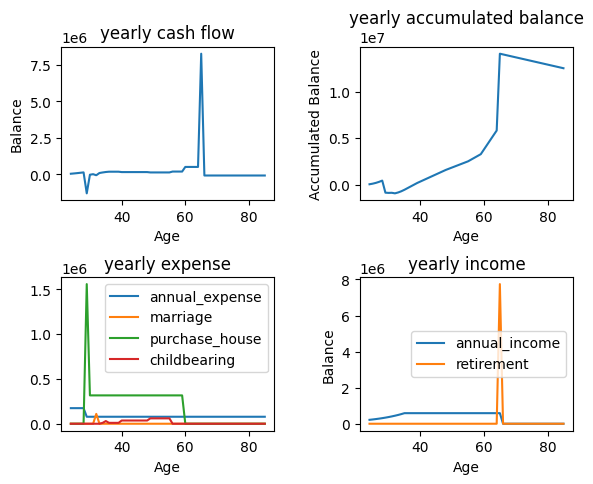

In [12]:
df = person_1.cash_flow.copy()
# yearly cash flow
plt.subplot(2, 2, 1)
plt.plot(df['year_balance'])
plt.title('yearly cash flow')
plt.xlabel('Age')
plt.ylabel('Balance')

# accumulated balance
plt.subplot(2, 2, 2)
plt.plot(df['accumulated_balance'])
plt.title('yearly accumulated balance')
plt.xlabel('Age')
plt.ylabel('Accumulated Balance')

# yearly expense
plt.subplot(2, 2, 3)
plt.plot(df['annual_expense'], label='annual_expense')
plt.plot(df['marriage'], label='marriage')
plt.plot(df['purchase_house'], label='purchase_house')
plt.plot(df['childbearing'], label='childbearing')
plt.title('yearly expense')
plt.legend()
plt.xlabel('Age')

# yearly income
plt.subplot(2, 2, 4)
plt.plot(df['annual_income'], label='annual_income')
plt.plot(df['retirement'], label='retirement')
plt.title('yearly income')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Balance')

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.5)

## Problems and Demands
### Unsmooth income and expense in specific periods

1. huge deficit when down payment and big surplus when retirement
  
2. tight budget to purchase a house before marriage

3. difficult to pay mortgage along
  
### Targets to achieve

1. a saving plan for kid's housing problem
  
2. an inheritence for the next generation family

## Advices and Plan
### Unsmooth income and expense

1. huge deficit when down payment and big surplus when retirement
- __Design a monthly saving plan before house purchasing and a pesion management scheme__<span style="color: green;">(Accepted)</span>
  
2. tight budget to purchase a house before marriage
- __Seek help from parents__<span style="color: green;">(Accepted)</span>
  
3. difficult to pay mortgage along
- __Take the other's income into consideration__<span style="color: red;">(Rejected)</span>

  
### Targets to achieve

1. a saving plan for kid's housing problem
  
2. an inheritence for the next generation family

In [13]:
# period before house purchase
person_1.cash_flow_table.head(10)

,age,marriage,purchase_house,childbearing,retirement,monthly_income,monthly_expense,year_balance,accumulated_balance
24,24,0.00,0.00,0.00,0.00,"18,100.00","14,500.00","43,200.00","43,200.00"
25,25,0.00,0.00,0.00,0.00,"19,760.00","14,500.00","63,120.00","106,320.00"
26,26,0.00,0.00,0.00,0.00,"21,586.00","14,500.00","85,032.00","191,352.00"
27,27,0.00,0.00,0.00,0.00,"23,594.60","14,500.00","109,135.20","300,487.20"
28,28,0.00,0.00,0.00,0.00,"25,804.06","14,500.00","135,648.72","436,135.92"
29,29,0.00,"1,558,398.04",0.00,0.00,"28,234.47","6,500.00","-1,297,584.45","-861,448.53"
30,30,0.00,"316,398.04",0.00,0.00,"30,907.91","6,500.00","-23,503.09","-884,951.62"
31,31,0.00,"316,398.04",0.00,0.00,"33,848.70","6,500.00","11,786.40","-873,165.22"
32,32,"110,000.00","316,398.04",0.00,0.00,"37,083.57","6,500.00","-59,395.15","-932,560.37"
33,33,0.00,"316,398.04",0.00,0.00,"40,641.93","6,500.00","93,305.14","-839,255.23"


In [14]:
# Plan1: saving plan between 24 and 28
df = person_1.cash_flow.loc[24:28][['monthly_income', 'monthly_expense']]
monthly_residual = df['monthly_income'] - df['monthly_expense']
monthly_residual_per_year = monthly_residual.values
class plan1:
    def __init__(self, return_rate, support):
        self.return_rate = return_rate
        self.support = support
    
    # monthly_amount = (montly_income - monthly_expense) * 0.8
    def monthly_amount(self, residual):
        result = []
        for i in residual:
            year_series = [i*0.8]*12
            result.extend(year_series)
        return result
    
    # calucate the fv of the monthly_amount
    def cal_fv(self, residual):
        cash_flow = self.monthly_amount(residual)
        balance = 0
        for i in range(len(cash_flow)):
            balance = (balance + cash_flow[i])*(1+self.return_rate/12)
        return balance
    
    # create lifelong cash flow series: saving plan + parents help
    # 24-28 periods cash flow out and 29 cash flow in 
    def apply_plan(self, residual):
        data = [0 for i in range(24, 85+1)]
        for i in range(0, 5):
            data[i] = -residual[i]*12
        data[5] = self.cal_fv(residual) + self.support
        return pd.Series(data, index=range(24, 85+1))
    
    # cal asset value series
    def asset_value(self, residual):
        data = [0 for i in range(24, 85+1)]
        cash_flow = self.monthly_amount(residual)
        value = 0 
        for i in range(len(cash_flow)):
            value = (value + cash_flow[i])
            if (i+1)%12 == 0:
                data[(i+1)//12] = value
        return pd.Series(data, index=range(24, 85+1))

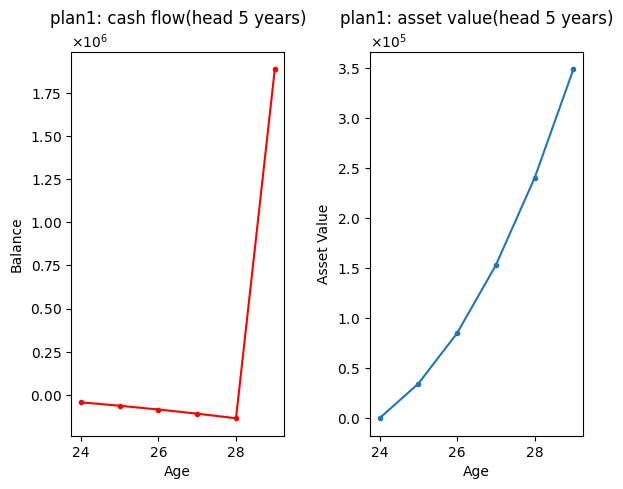

In [15]:
plan4house = plan1(0.05, 1500000)
plan4house.cal_fv(monthly_residual_per_year)

# cash flow
plt.subplot(1, 2, 1)
plt.title('plan1: cash flow(head 5 years)')
plt.xlabel('Age')
plt.ylabel('Balance') 
plt.plot(plan4house.apply_plan(monthly_residual_per_year)[:6], 'r', marker='.', linestyle='-')
# use 1e5 to represent 100000
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

# asset value
plt.subplot(1, 2, 2)
plt.title('plan1: asset value(head 5 years)')
plt.xlabel('Age')
plt.ylabel('Asset Value')
plt.plot(plan4house.asset_value(monthly_residual_per_year)[:6], marker='.', linestyle='-')
# adjust the space between subplots
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.5)
# use 1e5 to represent 100000
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

In [16]:
# period after retirement
person_1.cash_flow_table.loc[65, 'accumulated_balance']
print('When retire, the accumulated balance is: ', person_1.cash_flow_table.loc[65, 'accumulated_balance'] + ' yuan', sep='\n')

When retire, the accumulated balance is: 
14,069,091.86 yuan


In [17]:
# Plan2: pesion management scheme
# from 65-85, recieve 26500 as pension
# at 70, gift for child to purchase house, 5000000
# at 85, inheritence
class plan2:
    def __init__(self, initial_balance, monthly_pesion, gift, interest_rate):
        self.balance = initial_balance
        self.pension = monthly_pesion
        self.gift = gift
        self.ir = interest_rate
        self.pension_pv = self.pension_pv()
        self.gift_pv = self.gift_pv()
        self.inheritence_fv = self.inheritence_fv()
        assert self.balance >= self.pension_pv + self.gift_pv, 'balance is not enough for gift and pension'
    
    def pension_pv(self):
        pv = annuity(self.pension, self.ir, 20)
        return pv
    
    def gift_pv(self):
        pv = self.gift/(1+self.ir)**(70 - 65)
        return pv
    
    def inheritence_fv(self):
        fv = (self.balance - self.pension_pv - self.gift_pv)*(1+self.ir)**(85 - 65)
        return fv
    
    def apply_plan(self):
        data = [0 for i in range(24, 85+1)]
        data[65-24] = - self.balance
        # data[70-24] = - self.gift
        # data[85-24] = self.inheritence_fv
        for i in range(65-24, 85-24+1):
            data[i] += self.pension*12
        return pd.Series(data, index=range(24, 85+1))
    
    # cal asset value series
    def asset_value(self):
        data = [0 for i in range(24, 85+1)]
        # gift value
        for i in range(5):
            gift_value = self.gift_pv*(1+self.ir)**(i+1)
            data[65-24+i] += gift_value
        # pension value
        for i in range(1, 21):
            pension_value = annuity(self.pension, self.ir, 20-i)
            data[65-24+i] += pension_value
        # inheritence value
        for i in range(20):
            inheritence_value = self.inheritence_fv/(1+self.ir)**(i+1)
            data[85-24-i] += inheritence_value
        return pd.Series(data, index=range(24, 85+1))

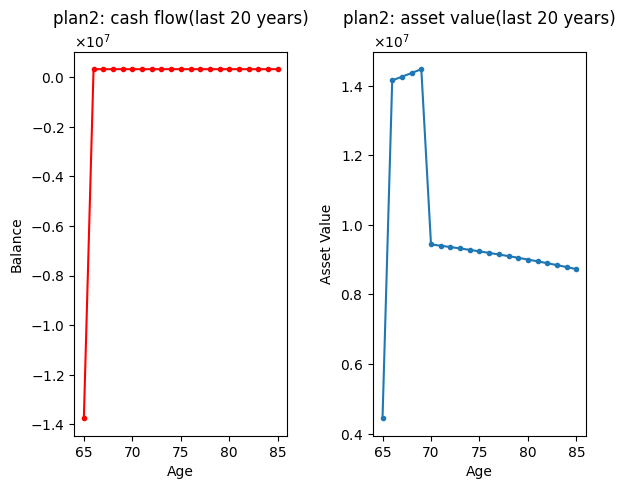

In [18]:
plan4retirement = plan2(person_1.cash_flow.loc[65, 'accumulated_balance'], 26500, 5000000, 0.03)
# cash flow
plt.subplot(1, 2, 1)
plt.title('plan2: cash flow(last 20 years)')
plt.xlabel('Age')
plt.ylabel('Balance') 
plt.plot(plan4retirement.apply_plan()[-21:], 'r',marker='.', linestyle='-')
# use 1e5 to represent 100000
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

# asset value
plt.subplot(1, 2, 2)
plt.title('plan2: asset value(last 20 years)')
plt.xlabel('Age')
plt.ylabel('Asset Value')
plt.plot(plan4retirement.asset_value()[-21:], marker='.', linestyle='-')
# adjust the space between subplots
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.5)
# use 1e5 to represent 100000
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

In [19]:
df1 = person_1.cash_flow.copy()
df1['plan4house_cash_flow'] = plan4house.apply_plan(monthly_residual_per_year)
df1['plan4retirement_cash_flow'] = plan4retirement.apply_plan()
df1['plan4house_asset_value'] = plan4house.asset_value(monthly_residual_per_year)
df1['plan4retirement_asset_value'] = plan4retirement.asset_value()
df1['Adjusted_balance'] = df1['year_balance'] + df1['plan4house_cash_flow'] + df1['plan4retirement_cash_flow']
df1['Adjusted_accumlated'] = df1['Adjusted_balance'].cumsum()
df1['Adjusted_accumlated'] = df1['Adjusted_accumlated'] + df1['plan4house_asset_value'] + df1['plan4retirement_asset_value']

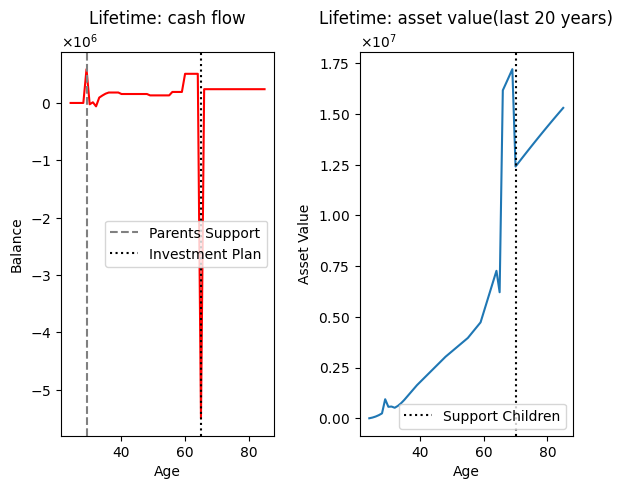

In [20]:
# cash flow
plt.subplot(1, 2, 1)
plt.title('Lifetime: cash flow')
plt.xlabel('Age')
plt.ylabel('Balance') 
plt.plot(df1['Adjusted_balance'], 'r', linestyle='-')
# use 1e5 to represent 100000
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
vertical_line_x = 29  
plt.axvline(x=vertical_line_x, color='gray', linestyle='--', label='Parents Support')
vertical_line_x = 65  
plt.axvline(x=vertical_line_x, color='black', linestyle=':', label='Investment Plan')
plt.legend()


# asset value
plt.subplot(1, 2, 2)
plt.title('Lifetime: asset value(last 20 years)')
plt.xlabel('Age')
plt.ylabel('Asset Value')
plt.plot(df1['Adjusted_accumlated'], linestyle='-')
# adjust the space between subplots
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.5)
# use 1e5 to represent 100000
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
vertical_line_x = 70 
plt.axvline(x=vertical_line_x, color='black', linestyle=':', label='Support Children')
plt.legend()